## ***Import Libraries***

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 13.7 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import cv2
from ultralytics import YOLO
import torch
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## ***YOLO Training***

In [ ]:
yaml_path = "/kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/data.yaml"

class YOLOTrainer:
    def __init__(self, task='', mode='', model='', imgsz=640, data='',
                 device=None, epochs=None, batch=None, learning_rate=None, optimizer=None, weight_decay=None, name='', exist_ok=True):
        self.task = task
        self.mode = mode
        self.model = model
        self.imgsz = imgsz
        self.data = data
        self.device = device
        self.epochs = epochs
        self.batch = batch
        self.name = name
        self.exist_ok = exist_ok
        self.learning_rate = learning_rate
        self.optimizer = optimizer
        self.weight_decay = weight_decay
    def load_model(self):
        model = YOLO(self.model)
        return model
    def train(self):
        model = self.load_model()
        model.train(task=self.task, mode=self.mode, data=self.data, device=self.device,
                    epochs=self.epochs, batch=self.batch, imgsz=self.imgsz,
                    name=self.name, exist_ok=self.exist_ok, lr0=self.learning_rate,
                    optimizer=self.optimizer, weight_decay=self.weight_decay)

In [4]:
trainer = YOLOTrainer(task='detect', mode='train', model='yolo11m.pt', imgsz=640, data=yaml_path, 
                      device=0, epochs=50, batch=16, learning_rate=0.001, optimizer='Adam', weight_decay=0.01, 
                      name='plate-detection', exist_ok=True)
trainer.train()

100%|██████████| 38.8M/38.8M [00:00<00:00, 179MB/s]


Ultralytics 8.3.24 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=plate-detection, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 11.6MB/s]
2024-10-29 15:01:34,406	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-29 15:01:35,703	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 52.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/train/labels... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<00:00, 238.54it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/valid/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 225.12it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/plate-detection/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.01), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/plate-detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.69G      1.481       3.18      1.534         20        640: 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         63         63      0.945      0.492      0.716      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.64G     0.8524     0.6589     0.9902         25        640: 100%|██████████| 14/14 [00:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         63         63      0.842      0.619      0.686      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.67G     0.8555     0.6418      1.029         22        640: 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         63         63      0.866      0.873      0.934      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.67G     0.8469     0.6411     0.9776         19        640: 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         63         63      0.714       0.73      0.703      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.68G     0.8321     0.5859     0.9787         28        640: 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         63         63      0.978      0.937      0.964       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.67G     0.8648     0.6136     0.9951         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.875      0.996      0.973      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.63G     0.7986        0.6      0.984         25        640: 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63       0.96      0.766      0.869      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.68G     0.8028     0.5348     0.9939         23        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         63         63      0.904      0.892      0.927      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.64G      0.884     0.5449      1.013         22        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         63         63      0.801       0.46      0.562      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.66G     0.7832     0.5248     0.9774         17        640: 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         63         63      0.948      0.905      0.915      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.64G     0.7501      0.498     0.9409         25        640: 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         63         63      0.977      0.984      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.68G      0.708     0.4852     0.9652         23        640: 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         63         63      0.979      0.984      0.994      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.64G     0.7479     0.4803     0.9464         13        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         63         63      0.968      0.975      0.991      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.68G     0.7471     0.5097     0.9461         12        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.946          1      0.992      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.64G     0.7076     0.4906     0.9423         15        640: 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         63         63      0.836      0.937      0.943       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.67G     0.6742     0.4702     0.9306         15        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.906      0.937      0.971      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.64G     0.6962     0.4763     0.9524         21        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         63         63      0.951      0.984       0.97      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.68G     0.6747     0.4877     0.9267         20        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         63         63      0.982      0.984      0.994      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.63G     0.7022     0.4885      0.934         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         63         63      0.994      0.984      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.68G     0.6472     0.4403      0.913         22        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         63         63      0.997          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.64G      0.647     0.4433     0.9095         17        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         63         63      0.996          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.67G     0.6662     0.4654     0.9223         21        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.965          1       0.99      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.63G     0.6335     0.4195     0.9207         18        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         63         63      0.982          1      0.995      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.68G     0.5927     0.4104     0.9098         22        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.983          1      0.991      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.63G     0.5802     0.4029     0.8948         29        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         63         63      0.952          1      0.991      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.68G     0.5913     0.4197     0.9025         14        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.982          1       0.99      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.63G     0.6176     0.4185     0.9178         17        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         63         63          1      0.996      0.995      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.66G     0.5704     0.4105     0.8971         12        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         63         63      0.984      0.999      0.994      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.63G     0.5629     0.3828     0.8935         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         63         63      0.983          1      0.993      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.68G      0.559     0.3846     0.8994         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         63         63      0.984          1      0.982      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.63G     0.5472     0.3701     0.8984         19        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         63         63      0.968          1       0.98      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.68G      0.562     0.3758     0.8971         26        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.983          1      0.981      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.63G     0.5358     0.3616     0.8956         25        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         63         63      0.983          1      0.993      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.67G     0.5538     0.3848      0.875         17        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         63         63      0.984      0.998      0.992      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.63G     0.5187     0.3706     0.8805         15        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.984          1      0.992      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.68G     0.5272     0.3515     0.8947         17        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63       0.98          1      0.989      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.63G     0.5256     0.3716     0.8913         13        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.967          1      0.987       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.67G     0.5011     0.3463     0.8792         18        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         63         63      0.984          1      0.991      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.64G     0.5066     0.3487     0.8869         17        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         63         63      0.983          1      0.991      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.67G     0.4992      0.331     0.8845         23        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         63         63      0.984          1      0.992       0.92


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.64G     0.4277     0.2998     0.8535         11        640: 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         63         63      0.984          1      0.991      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.68G      0.438     0.2922     0.8713         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         63         63      0.983          1      0.992      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.64G     0.4171     0.2811     0.8676         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.983          1      0.993      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.67G     0.3967     0.2697     0.8645         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         63         63      0.983          1      0.993      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.64G     0.4029     0.2738     0.8755         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.983          1      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.68G     0.3739     0.2542     0.8457         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         63         63      0.983          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.64G     0.3848      0.257     0.8491         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.983          1      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.68G     0.3668     0.2636     0.8435         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         63         63      0.983          1      0.995       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.64G     0.3656     0.2618     0.8576         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         63         63      0.984          1      0.995      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.67G     0.3555     0.2458     0.8552         11        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         63         63      0.984          1      0.995      0.938



50 epochs completed in 0.144 hours.
Optimizer stripped from runs/detect/plate-detection/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/plate-detection/weights/best.pt, 40.5MB

Validating runs/detect/plate-detection/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]


                   all         63         63      0.983          1      0.995      0.941
Speed: 0.2ms preprocess, 12.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/plate-detection


## ***Prediction***

In [5]:
class YOLOTester:
    def __init__(self, mode='predict', model='', source='', device=None, exist_ok=True):
        self.mode = mode
        self.model = model
        self.source = source
        self.device = device
        self.exist_ok = exist_ok
    def load_model(self):
        model = YOLO(self.model)
        return model
    def make_prediction(self, img_path):
        model = self.load_model()
        img = Image.open(img_path)
        results = model.predict(source=img, save=False)
        return results


0: 640x640 1 Plates, 37.0ms
Speed: 2.0ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 35.4ms
Speed: 1.7ms preprocess, 35.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 35.4ms
Speed: 1.7ms preprocess, 35.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 35.4ms
Speed: 1.7ms preprocess, 35.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 36.9ms
Speed: 1.6ms preprocess, 36.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plates, 34.7ms
Speed: 1.6ms preprocess, 34.7ms inference, 1.4ms postprocess per image at shape (1, 3, 64

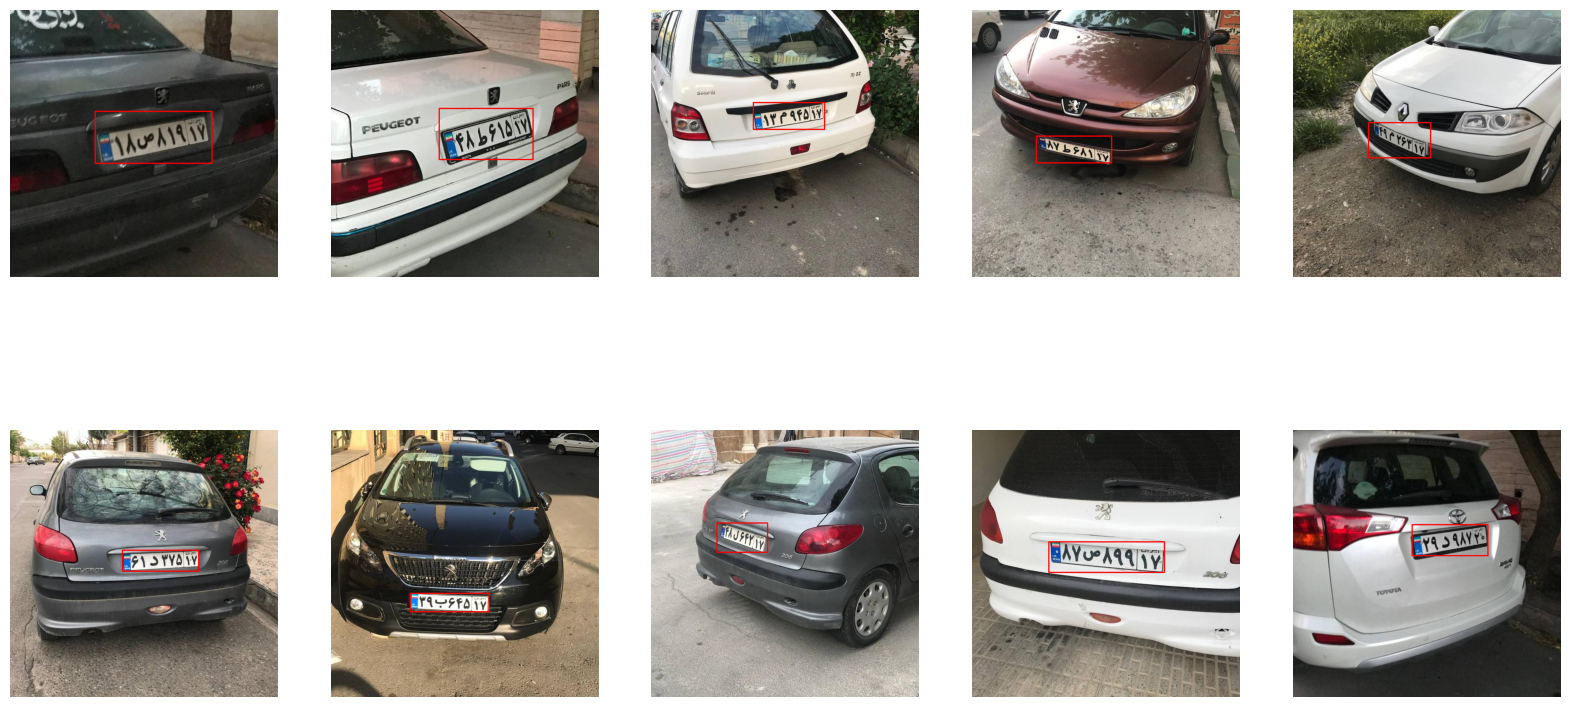

In [6]:
test_data_dir = '/kaggle/input/car-plate-detection-yolov8/Persian_Car_Plates_YOLOV8/test/images'
model_path = '/kaggle/working/runs/detect/plate-detection/weights/best.pt'
tester = YOLOTester(mode='predict', model=model_path, device=0, exist_ok=True)
output_images = []

# Perform detection on the first 10 images
for img_name in os.listdir(test_data_dir)[:10]:
    img_path = os.path.join(test_data_dir, img_name)
    if img_path.endswith(('.png', '.jpg', '.jpeg')):
        # Open the image and get predictions
        results = tester.make_prediction(img_path)
        img = cv2.imread(img_path)
        
        # Check if there are any detections
        if len(results[0].boxes) > 0:
            # Draw rectangle around detected areas
            for result in results:
                box = result.boxes[0]  # Get the bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Retrieve coordinates as integers
                
                # Draw a rectangle around the detected area (for example, in red)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red rectangle with 2px thickness
        
        # Store the result
        output_images.append((img_name, img))

# Visualize the results using matplotlib
plt.figure(figsize=(20, 10))
for i, (img_name, img) in enumerate(output_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

plt.show()